<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    ML for Bioinformatics <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
<font color=3C99D size=5>
    Homework 2: Practical - Support Vector Machines <br>
<font color=696880 size=4>
    Ali Shafiei (shafieiali42@gmail.com) <br>
    Ali Salmani (alisalmani200149@gmail.com)

____


### Full Name :Abolfazl Malekahmadi
### Student Number : 401205167
__

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

# Support Vector Machines (SVM)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [33]:
df = pd.read_csv("Liver_Disease.csv") 
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [34]:
df.shape

(583, 11)

In [35]:
count = df['Gender'].value_counts()

print(count)

Male      441
Female    142
Name: Gender, dtype: int64


### Pre-Processing

In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.
#### Exploratory Data Analysis (EDA):
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

In [36]:
group1 = df[df['label'] == 1]
group2 = df[df['label'] == 2]
group1.count()

Age                           416
Gender                        416
Total_Bilirubin               416
Direct_Bilirubin              416
Alkaline_Phosphotase          416
Alamine_Aminotransferase      416
Aspartate_Aminotransferase    416
Total_Protiens                416
Albumin                       416
Albumin_and_Globulin_Ratio    414
label                         416
dtype: int64

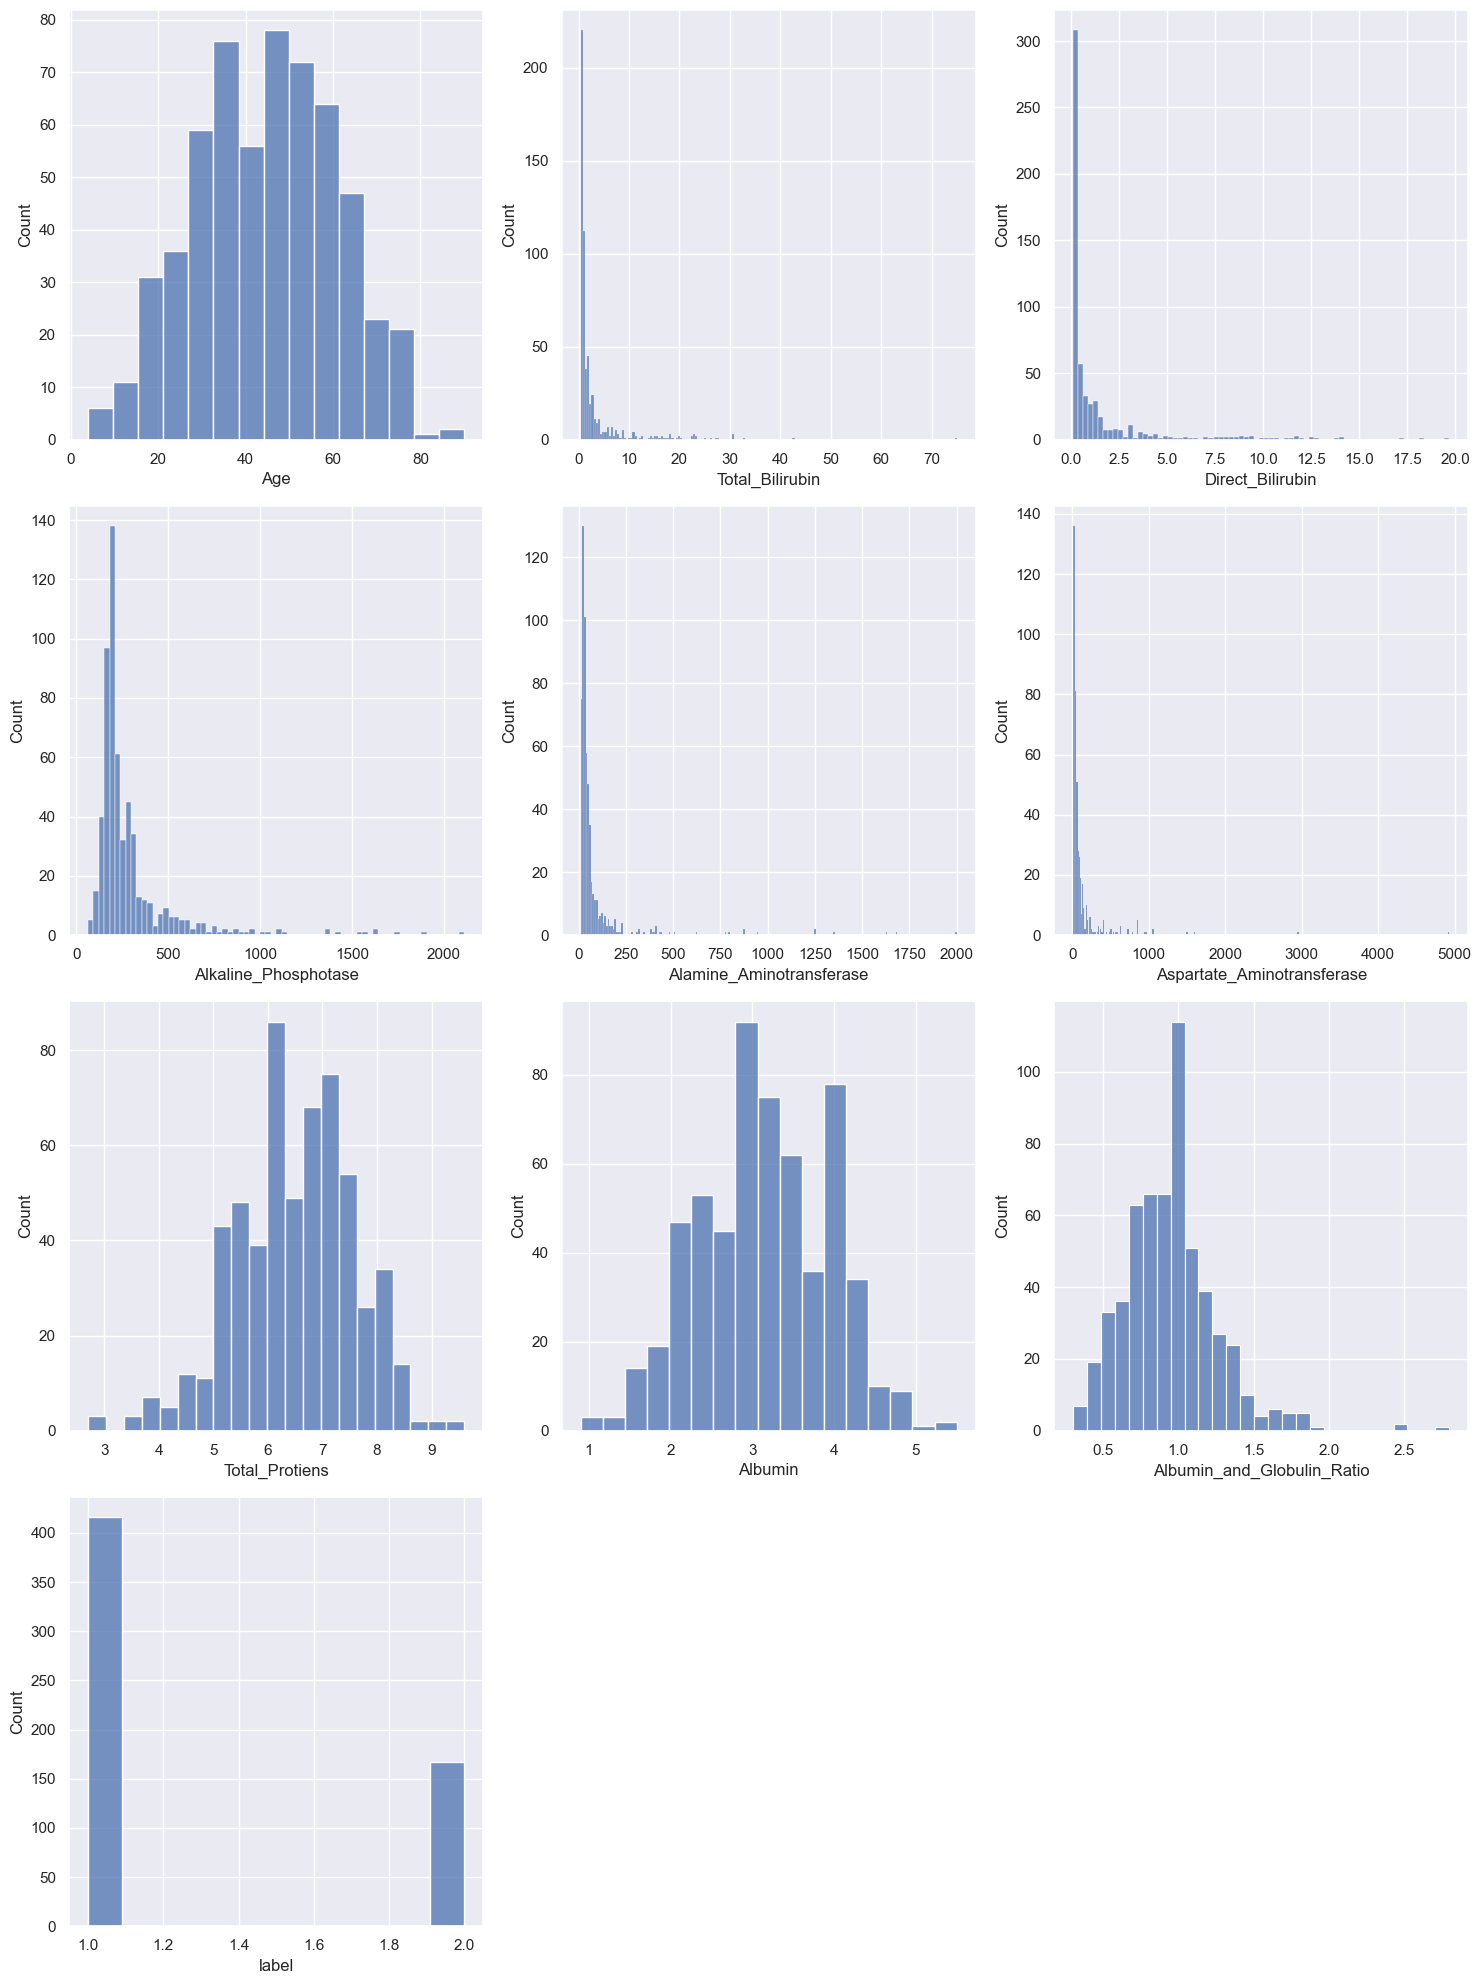

In [37]:
cols = 3
rows = 4
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax = fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

(583, 11)


Before :( 

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
label                         0
dtype: int64


After :) 

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
label                         0
dtype: int64


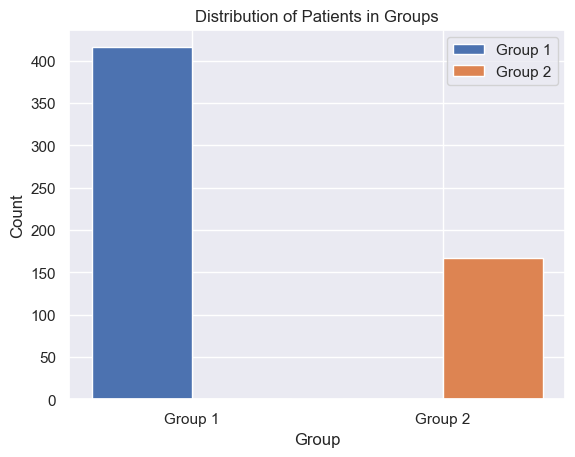

The dataset is imbalanced.


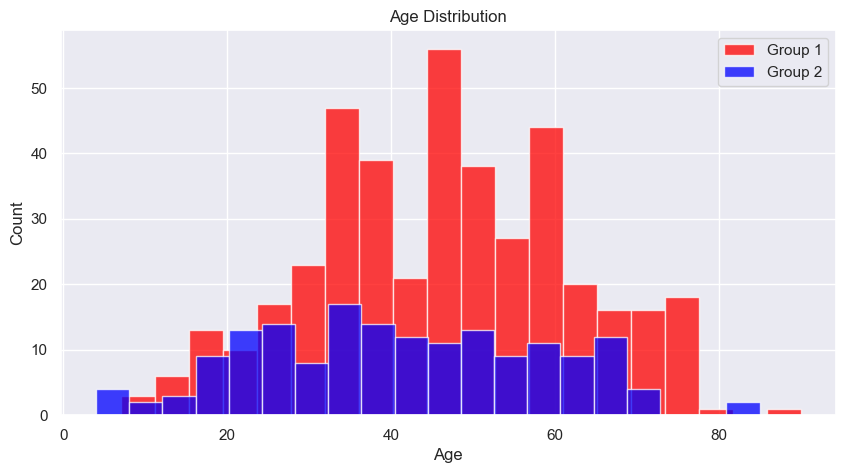

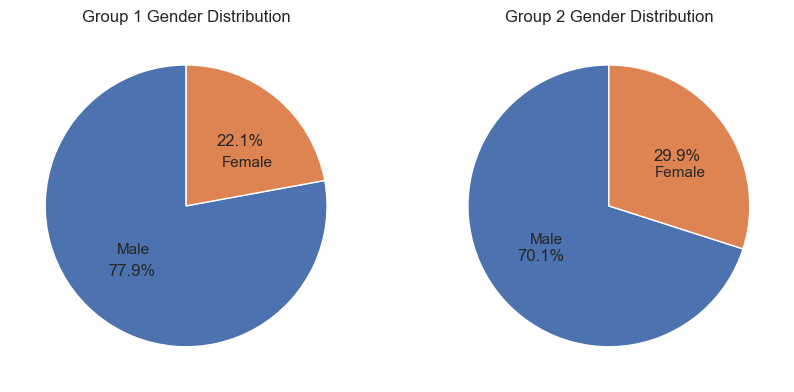

In [38]:
###############################################################################
## TODO: Find the shape of the dataset.                                      ##
###############################################################################

print(df.shape)

###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
###############################################################################
print('\n')
print('Before :( \n')
print(df.isna().sum())

#becuse we have null data we should fi this problem 

mean_value = df['Albumin_and_Globulin_Ratio'].mean()

# Fill the missing values with the mean value
df['Albumin_and_Globulin_Ratio'].fillna(mean_value, inplace=True)
print('\n')
print('After :) \n')
print(df.isna().sum())

###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ##
###############################################################################
group1 = df[df['label'] == 1]
group2 = df[df['label'] == 2]

# Plot the histogram
plt.hist([group1['label'], group2['label']], bins=[0.5, 1.5, 2.5], label=['Group 1', 'Group 2'])
plt.title('Distribution of Patients in Groups')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks([1, 2], ['Group 1', 'Group 2'])
plt.legend()
plt.show()
# Check if the dataset is balanced or not
if group1.shape == group2.shape :
    print('The dataset is balanced.')
else:
    print('The dataset is imbalanced.')
    
###############################################################################
## TODO: plot the age distirbution and gender distrbution for both group    ##
## of patients.(4 plots)                                                    ##
###############################################################################

# Split the dataset into two groups based on the label column
group1 = df[df['label'] == 1]
group2 = df[df['label'] == 2]

# Plot the age distribution for both groups
plt.figure(figsize=(10,5))
plt.hist(group1['Age'], bins=20, alpha=0.75, label='Group 1' , color='red')
plt.hist(group2['Age'], bins=20, alpha=0.75, label='Group 2',color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plot the gender distribution for both groups
plt.figure(figsize=(10,5))
group1_gender = group1['Gender'].value_counts()
group2_gender = group2['Gender'].value_counts()
plt.subplot(1,2,1)
plt.pie(group1_gender, labels=group1_gender.index, autopct='%1.1f%%', startangle=90 , labeldistance=0.4)
plt.title('Group 1 Gender Distribution')

plt.subplot(1,2,2)
plt.pie(group2_gender, labels=group2_gender.index, autopct='%1.1f%%', startangle=90,labeldistance=0.4)
plt.title('Group 2 Gender Distribution')
plt.show()



##### Question: What do you conclude from the plots?
***


      From the first chart, we can conclude that both groups of patients have a similar age distribution. The majority of patients in both groups are between the ages of 35 and 60. However, there are also a significant number of patients in both groups who are above the age of 60.  This suggests that age may be an important factor in determining the health condition of the patients. It could be useful to investigate further whether there is an age-based difference in the prevalence or severity of the medical condition that the patients are experiencing

***

      From second the chart, we can conclude that the proportion of male patients is higher than female patients in both groups. However, the proportion of male patients is significantly higher in group 1 compared to group 2.

      This suggests that gender may be an important factor in determining the health condition of the patients. It could be useful to investigate further whether there is a gender-based difference in the prevalence or severity of the medical condition that the patients are experiencing. 

      Overall, this chart provides important insights into the distribution of the two groups of patients by gender, which could be useful for further analysis and research.








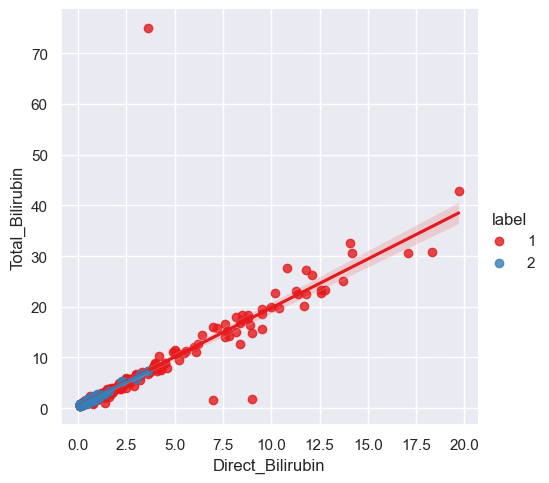

In [39]:
sns.set()

g = sns.lmplot(x="Direct_Bilirubin", y="Total_Bilirubin", hue="label",
               height=5, data=df,  palette="Set1")

g.set_axis_labels("Direct_Bilirubin", "Total_Bilirubin")

#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

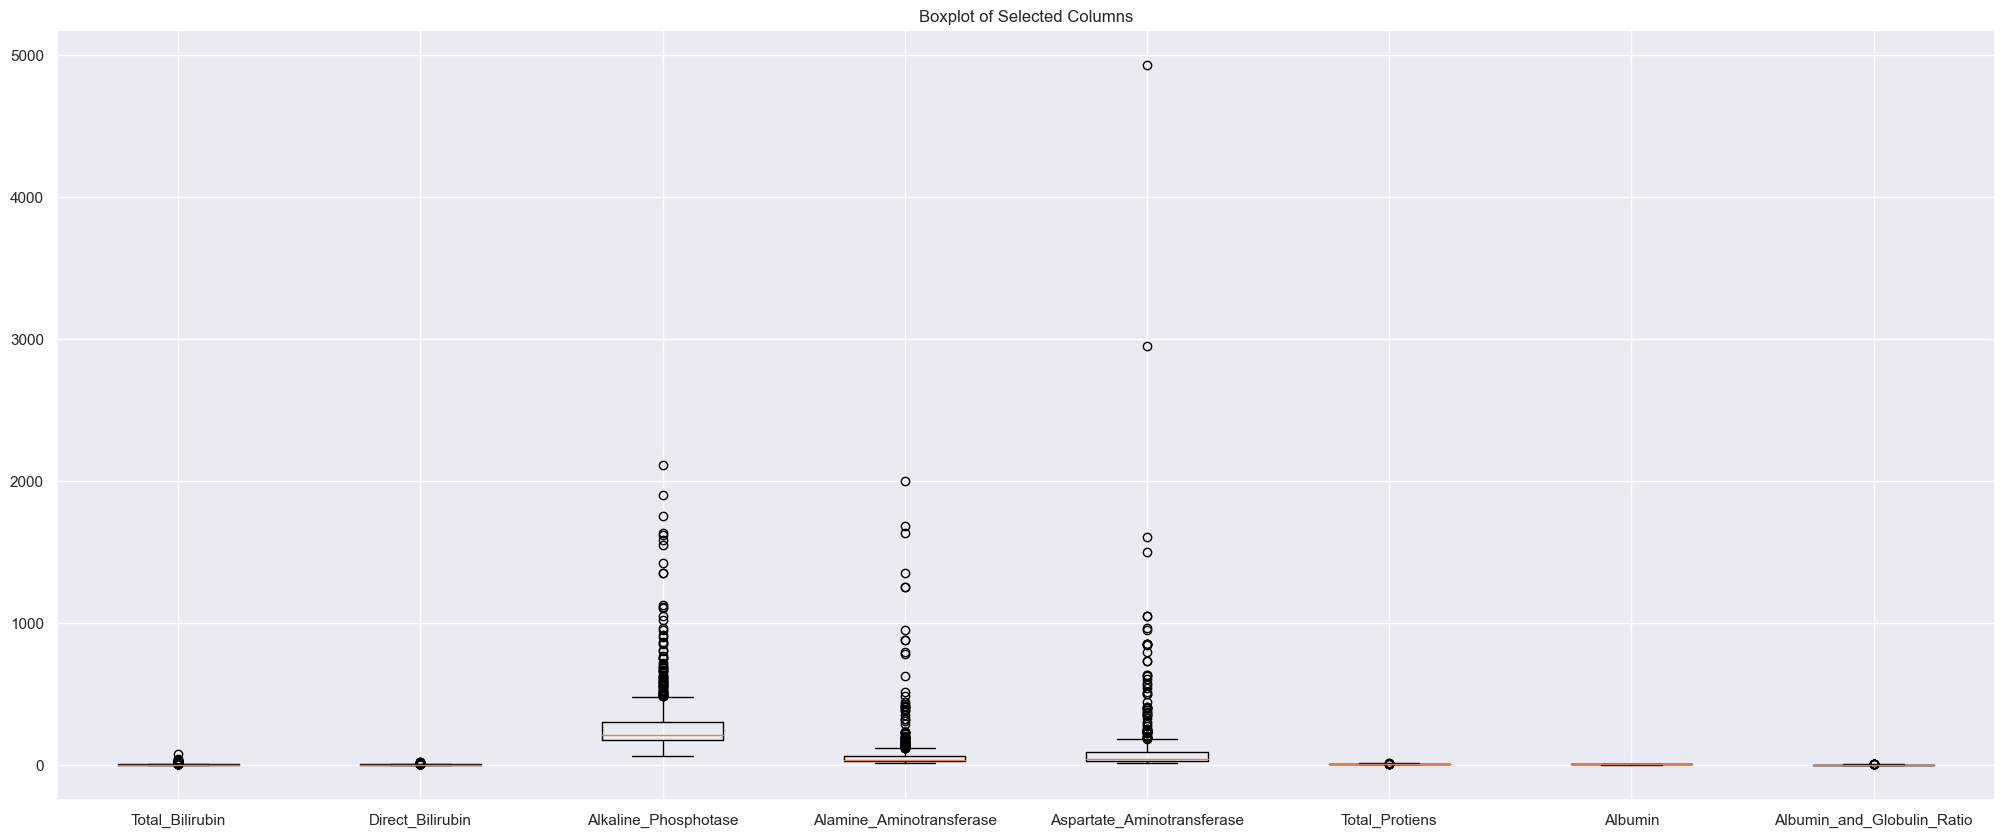

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the columns to plot
cols_to_plot = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio',]

# Create the boxplot
plt.figure(figsize=(25,10))
plt.boxplot(df[cols_to_plot].values, labels=cols_to_plot)
plt.title('Boxplot of Selected Columns')
plt.show()


In [41]:
################################################################################
## TODO
################################################################################

In [42]:
column_name = 'Aspartate_Aminotransferase'
# Calculate the Z-score for the chosen column
z_score = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())
outliers_aa = np.where(z_score > 5)
print(outliers_aa)
first_outlier_data=df.iloc[outliers_aa]
df = df.drop(outliers_aa[0], axis=0)
df

(array([117, 118, 135]),)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [43]:
column_name = 'Alkaline_Phosphotase'
z_score = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())
outliers_ap = np.where(z_score > 5)
print(outliers_ap)
second_outlier_data=df.iloc[outliers_ap]
df = df.drop(outliers_ap[0], axis=0)
df

(array([ 77, 115, 116, 126, 230, 426, 444]),)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


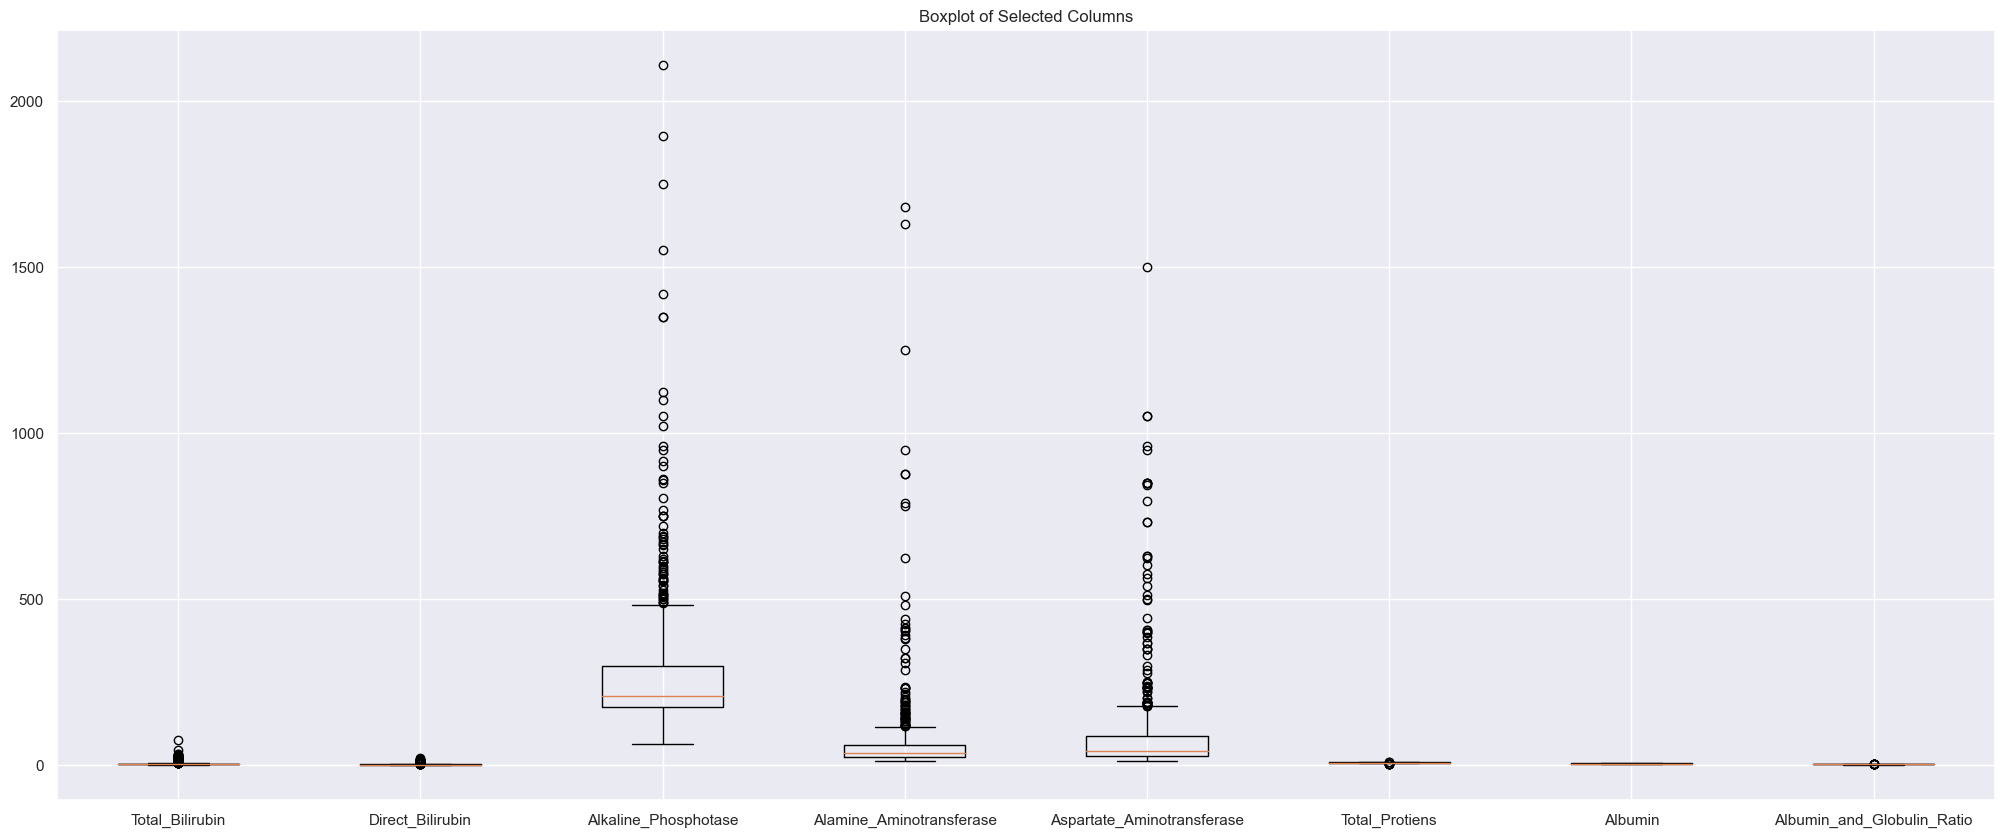

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

cols_to_plot = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                'Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio',]

plt.figure(figsize=(25,10))
plt.boxplot(df[cols_to_plot].values, labels=cols_to_plot)
plt.title('Boxplot of Selected Columns')
plt.show()


#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [45]:
dfn=df.copy()
dfn



,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [46]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized.                     ##
################################################################################
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                        'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens','Albumin', 'Albumin_and_Globulin_Ratio']

scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,65,0,0.004021,0.000000,0.060576,0.003593,0.005369,0.594203,0.521739,0.240,1
1,62,1,0.140751,0.275510,0.310699,0.032335,0.060403,0.695652,0.500000,0.176,1
2,62,1,0.092493,0.204082,0.208598,0.029940,0.038926,0.623188,0.521739,0.236,1
3,58,1,0.008043,0.015306,0.058134,0.002395,0.006711,0.594203,0.543478,0.280,1
4,72,1,0.046917,0.096939,0.064485,0.010180,0.032886,0.666667,0.326087,0.040,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.001340,0.000000,0.213483,0.005988,0.016107,0.463768,0.152174,0.028,2
579,40,1,0.002681,0.000000,0.017098,0.014970,0.014094,0.478261,0.500000,0.320,1
580,52,1,0.005362,0.005102,0.088911,0.022754,0.026174,0.536232,0.500000,0.280,1
581,31,1,0.012064,0.020408,0.059111,0.011377,0.014765,0.594203,0.543478,0.280,1


### SVM

#### spliting data

In [48]:
## TODO Split the data into test and training sets.
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify=df['Gender'])

X_train

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
566,50,0,0.008043,0.010204,0.062531,0.007186,0.014094,0.739130,0.673913,0.280
249,33,1,0.010724,0.010204,0.212506,0.010778,0.010067,0.623188,0.456522,0.160
507,50,1,0.006702,0.010204,0.063996,0.107784,0.042282,0.695652,0.652174,0.280
71,75,0,0.005362,0.005102,0.061065,0.005988,0.012752,0.246377,0.195652,0.120
570,16,1,0.029491,0.056122,0.084514,0.072455,0.053691,0.391304,0.369565,0.240
...,...,...,...,...,...,...,...,...,...,...
10,57,1,0.002681,0.000000,0.071812,0.024551,0.032886,0.463768,0.391304,0.200
34,38,0,0.029491,0.056122,0.169516,0.029341,0.031544,0.420290,0.456522,0.200
411,23,0,0.025469,0.035714,0.217880,0.010778,0.022819,0.608696,0.434783,0.160
235,60,1,0.014745,0.025510,0.145090,0.131737,0.193289,0.260870,0.239130,0.200


In [49]:
X_train.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
dtype: int64

### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [50]:
#########################################################################################
## TODO
#########################################################################################
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)


print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

           1       0.78      1.00      0.88        90
           2       0.00      0.00      0.00        25

    accuracy                           0.78       115
   macro avg       0.39      0.50      0.44       115
weighted avg       0.61      0.78      0.69       115

Accuracy: 0.782608695652174


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [51]:
#########################################################################################
## TODO
#########################################################################################
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}
svm_model = SVC()

grid_search = GridSearchCV(svm_model, param_grid, cv=5 , scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Train an svm model on the entire training data using the parameters you found in the previous step.

In [52]:
#########################################################################################
## TODO
#########################################################################################
from sklearn.svm import SVC
from sklearn import metrics

svm_model = SVC(C=10, gamma=0.1, kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("SVM w/ Crow Search - Accuracy:", metrics.accuracy_score(y_test, y_pred))


SVM w/ Crow Search - Accuracy: 0.7304347826086957


### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

***
The confusion matrix is a table that summarizes the performance of a machine learning model. It shows the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) for a binary classification problem.

The entries of the confusion matrix are defined as follows:

True Positive (TP): The number of positive cases that are correctly predicted as positive.

False Positive (FP): The number of negative cases that are incorrectly predicted as positive.

True Negative (TN): The number of negative cases that are correctly predicted as negative.

False Negative (FN): The number of positive cases that are incorrectly predicted as negative.

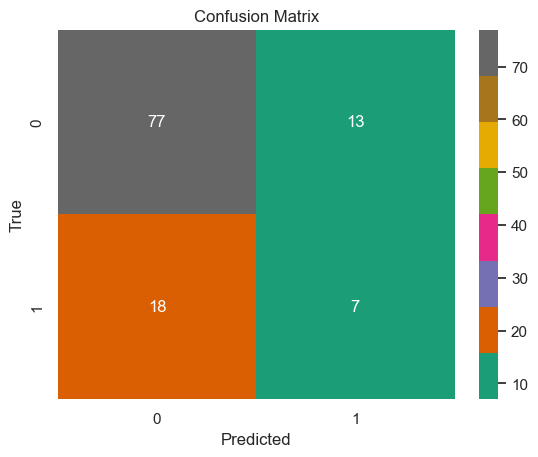

Model accuracy on test set: 0.7304347826086957


In [53]:
#########################################################################################
## TODO
#########################################################################################
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Dark2')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
accuracy = svm_model.score(X_test, y_test)
print('Model accuracy on test set:', accuracy)



Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

In [216]:
#########################################################################################
## TODO
#########################################################################################


In [217]:
fist_outliter_data_add=pd.concat([dfn,first_outlier_data],axis=0)
new_df=pd.concat([fist_outliter_data_add,second_outlier_data])
new_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
116,48,Male,0.7,0.1,1630,74,149,5.3,2.0,0.60,1
128,58,Female,1.7,0.8,1896,61,83,8.0,3.9,0.95,1
233,33,Male,2.0,1.4,2110,48,89,6.2,3.0,0.90,1
429,73,Male,1.9,0.7,1750,102,141,5.5,2.0,0.50,1


In [218]:
columns_to_normalize = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                        'Aspartate_Aminotransferase', 'Total_Protiens','Albumin', 'Albumin_and_Globulin_Ratio']

scaler = MinMaxScaler()
new_df[columns_to_normalize] = scaler.fit_transform(new_df[columns_to_normalize])
le = LabelEncoder()
new_df['Gender'] = le.fit_transform(new_df['Gender'])

X = new_df.drop('label', axis=1)
y = new_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify=new_df['Gender'])

In [219]:
svm_M = svm.SVC()
svm_M.fit(X_train, y_train)
y_pred = svm_M.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        92
           2       0.00      0.00      0.00        25

    accuracy                           0.79       117
   macro avg       0.39      0.50      0.44       117
weighted avg       0.62      0.79      0.69       117

Accuracy: 0.7863247863247863


/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


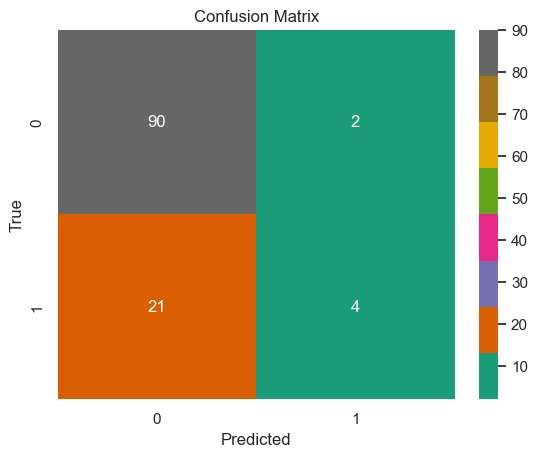

              precision    recall  f1-score   support

           1       0.81      0.98      0.89        92
           2       0.67      0.16      0.26        25

    accuracy                           0.80       117
   macro avg       0.74      0.57      0.57       117
weighted avg       0.78      0.80      0.75       117

Accuracy: 0.8034188034188035


In [220]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Dark2')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy)

we train both the logistic regression and SVM models on the dataset, and we find that the logistic regression model performs better than the SVM model in terms of accuracy. This means that the logistic regression model can correctly classify more reviews as label one or label 2 compared to the SVM model.  The reason why logistic regression may work better than SVMs in this case could be that logistic regression is a linear model and is more suitable for linearly separable datasets. In contrast, SVMs can handle non-linearly separable datasets by mapping the data to a higher-dimensional space, which may not be necessary in our example dataset.  Moreover, logistic regression has a simpler structure and requires less computational resources compared to SVMs, making it easier to train and deploy on large datasets.  In conclusion, while both logistic regression and SVMs are powerful algorithms for classification tasks, their performance may vary depending on the dataset and the problem at hand. In some cases, logistic regression may work better than SVMs, as it is more suitable for linearly separable datasets and requires less computational resources